#### ================================================
#### 🚀 Projet : Prédiction de la Longévité d'un Joueur en NBA
#### =================================================
##### Auteur : Ibtissam LOUKILI
#### Objectif : Développer un classificateur performant capable de prédire 
####            si un joueur aura une carrière de plus de 5 ans en NBA.
#### =================================================

*Ce fichier Jupyter Notebook est consacré à deux grandes étapes dans l'analyse d'une base de statistiques NBA.*

*La première partie est dédiée au prétraitement des données, incluant des étapes d'importation, d'inspection, d'analyse de la qualité des données et de gestion des valeurs manquantes. L'objectif de cette section est de préparer le jeu de données pour des analyses plus approfondies.*

*La deuxième partie se concentre sur l'Analyse Exploratoire des données. Elle comprend une analyse de l'équilibre des classes, des visualisations, la sélection des variables et la séparation des données. Cette étape vise à explorer et à comprendre la structure des données afin d'en tirer des insights précieux pour les analyses suivantes et les modèles prédictifs.*

### 1. Prétraitement des données

Nous commençons par charger les données et vérifier leur qualité.

##### 1.1 Importation des Bibliothèques

Nous utilisons les bibliothèques suivantes pour la manipulation et l'analyse des données:

In [500]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import skew
from sklearn.preprocessing import FunctionTransformer

##### 1.2 Chargement des Données

Les données sont issues du fichier nba_logreg.csv. Nous les chargeons dans un DataFrame pour faciliter leur exploration et leur traitement.

In [501]:
df_NBA = pd.read_csv("nba_logreg.csv")

##### 1.3 Inspectation des Données

Nous examinons les premières lignes du jeu de données pour comprendre sa structure.

In [502]:
df_NBA.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Nous vérifions ensuite les informations générales sur les colonnes et les types de données:

In [503]:
df_NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

Le DataFrame contient 1340 entrées, chacune représentant un joueur, avec 19 statistiques sportives en plus du nom du joueur.

👉 *Pour plus de détails sur la signification des différentes statistiques, veuillez vous référer au rapport technique.*


##### 1.4 Gestion des Duplicatas 

Une préparation rigoureuse des données est essentielle avant toute analyse ou modélisation. 

Cette section aborde la gestion des lignes dupliquée dans le jeu de données.

Nous vérifions l'existence de doublons dans le jeu de données et les supprimons afin d'éviter tout biais dans les analyses.

In [504]:
df_NBA.duplicated().sum()

12

La vérification révèle 12 lignes dupliquées. Nous procédons donc à leur suppression.

In [505]:
df_NBA_new = df_NBA.drop_duplicates() 
print(df_NBA_new.shape) #Vérification de la nouvelle taille du DataFrame

(1328, 21)


Après suppression, le Dataframe contient désormais 1328 lignes et 21 colonnes, garantissant ainsi une meilleur qualité des données.

##### 1.5 Gestion des valeurs manquantes

Nous identifions les valeurs manquantes présentes dans chaque colonne.

In [506]:
print(df_NBA_new.isnull().sum()) 

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            10
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


Seule la variable 3P% présente des valeurs manquantes (10 entrées nulles)

Nous utilisons une approche d'imputation basée sur des données existantes pour estimer les valeurs manquantes de 3P%.

Plutôt que de remplacer arbitrairement les valeurs manquantes par une moyenne ou une médiane, nous recalculons 3P% en utilisant les variables 3P Made et 3PA selon la formule suivante :

$$
3P\% = \frac{\text{3P Made}}{\text{3PA}} \times 100
$$

Si un joueur n'a tenté aucun tir à trois points (3PA = 0), nous supposons un pourcentage de réussite de 0%.


In [507]:
#imputation des valeurs manquantes de 3P%
df_NBA_new.loc[df_NBA_new["3P%"].isnull(), "3P%"] = df_NBA_new.apply(
    lambda row : (row['3P Made'] / row['3PA'] * 100) if row['3PA'] > 0 else 0, axis=1 
)

Après imputation nous vérifions que toutes les valeurs manquantes ont bien été traitées.

In [508]:
#Verification de l'absence des valeurs manquantes
print(df_NBA_new.isnull().sum()) 

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64


Toutes les colonnes sont désormais complètes.

##### 1.6 Traitement des Valeurs Aberrantes

L’identification et la correction des valeurs aberrantes sont des étapes cruciales dans la préparation des données. Dans notre jeu de données, nous distinguons deux types de valeurs aberrantes :

- **Les valeurs extrêmes** : elles peuvent refléter des performances exceptionnelles (positives ou négatives) réelles de joueurs et sont donc conservées.
- **Les valeurs impossibles** : elles ne respectent pas les règles fondamentales du basket-ball (ex. un joueur ayant plus de tirs réussis que tentés). Ces valeurs nécessitent une correction.


Nous filtrons le dataset en appliquant des contraintes logiques afin d'identifier les valeurs qui ne respectent pas les règles NBA.

In [509]:
# Identification des valeurs impossibles 
df_NBA_filtered = df_NBA_new[
    (df_NBA_new['FG%'] >= 0) & (df_NBA_new['FG%'] <= 100) &  # % de tirs entre 0 et 100
    (df_NBA_new['3P%'] >= 0) & (df_NBA_new['3P%'] <= 100) &  # % de 3 points entre 0 et 100
    (df_NBA_new['FT%'] >= 0) & (df_NBA_new['FT%'] <= 100) &  # % de lancers francs entre 0 et 100
    (df_NBA_new['MIN'] <= 48) &  # Pas plus de 48 min en moyenne par match
    (df_NBA_new['PTS'] >= 0) &  # Pas de points négatifs
    (df_NBA_new['FGM'] <= df_NBA_new['FGA']) &  # Pas plus de tirs réussis que tentés
    (df_NBA_new['3P Made'] <= df_NBA_new['3PA']) &  # Pas plus de 3 points réussis que tentés
    (df_NBA_new['FTM'] <= df_NBA_new['FTA']) &  # Pas plus de lancers francs réussis que tentés
    (df_NBA_new['OREB'] + df_NBA_new['DREB'] == df_NBA_new['REB'])  # Vérification des rebonds
]

print(f"Dataset après suppression des valeurs impossibles : {df_NBA_filtered.shape[0]} lignes")


Dataset après suppression des valeurs impossibles : 813 lignes


Après application de ces règles, le nombre d'entrées passe de 1328 à 813, confirmant ainsi la présence de nombreuses valeurs impossibles. Toutefois, supprimer ces données entraîne une perte importante d’informations. Il est donc préférable de les corriger plutôt que de les éliminer.

Plutôt que de supprimer ces données, nous appliquons des corrections en s'assurant que toutes les valeurs respectent les règles du basket-ball.

In [510]:
df_NBA_fnl = df_NBA_new.copy()

# Correction des pourcentages en les ramenant entre 0 et 100
df_NBA_fnl.loc[:, 'FG%'] = df_NBA_fnl['FG%'].clip(0, 100)
df_NBA_fnl.loc[:, '3P%'] = df_NBA_fnl['3P%'].clip(0, 100)
df_NBA_fnl.loc[:, 'FT%'] = df_NBA_fnl['FT%'].clip(0, 100)

# Correction du temps de jeu (ne peut pas dépasser 48 minutes par match)
df_NBA_fnl.loc[:, 'MIN'] = df_NBA_fnl['MIN'].clip(upper=48)

# Suppression des points négatifs (remplacés par 0)
df_NBA_fnl.loc[:, 'PTS'] = df_NBA_fnl['PTS'].clip(lower=0)

# Correction des tirs réussis (ne peut pas dépasser les tirs tentés)
df_NBA_fnl.loc[:, 'FGM'] = np.minimum(df_NBA_fnl['FGM'], df_NBA_fnl['FGA'])

# Correction des tirs à 3 points réussis (ne peut pas dépasser les tentatives)
df_NBA_fnl.loc[:, '3P Made'] = np.minimum(df_NBA_fnl['3P Made'], df_NBA_fnl['3PA'])

# Correction des lancers francs réussis (ne peut pas dépasser les tentatives)
df_NBA_fnl.loc[:, 'FTM'] = np.minimum(df_NBA_fnl['FTM'], df_NBA_fnl['FTA'])

# Correction des rebonds totaux (doit être la somme des rebonds offensifs et défensifs)
df_NBA_fnl.loc[:, 'REB'] = df_NBA_fnl['OREB'] + df_NBA_fnl['DREB']

print(f"Dataset après correction des valeurs impossibles : {df_NBA_fnl.shape[0]} lignes")


Dataset après correction des valeurs impossibles : 1328 lignes


Après correction, nous retrouvons 1328 entrées, confirmant que nous avons réussi à ajuster les valeurs impossibles au lieu de les supprimer.



### 2. Analyse Exploratoire des données

Avant d’entraîner un modèle de classification, il est essentiel de bien comprendre la distribution des variables, notamment la variable cible **TARGET_5Yrs**.

 Cette section se concentre sur l’équilibre des classes et l’analyse statistique des données.

##### 2.1 Analyse de l'équilibre des classes

L'équilibre des classes est un aspect crucial dans un problème de classification. Un déséquilibre peut entrainer un biais dans l'apprentissage du modèle, favorisant la classe majoritaire.

- Répartition de la variable cible : Nous calculons la fréquence de joueurs ayant une carrière de 5 ans ou plus et ceux ayant une carrière plus courte.

In [511]:
# Calcul des fréquences de TARGET_5Yrs
target_frequencies = df_NBA_fnl['TARGET_5Yrs'].value_counts(normalize=True) * 100

# Affichage des fréquences en pourcentage
print("Répartition de la variable TARGET_5Yrs (en %):\n", target_frequencies)

Répartition de la variable TARGET_5Yrs (en %):
 1.0    62.048193
0.0    37.951807
Name: TARGET_5Yrs, dtype: float64


- Visualisation de la Répartition : Nous utilisons un graphique pour mieux illustrer la distribution de la variable cible.

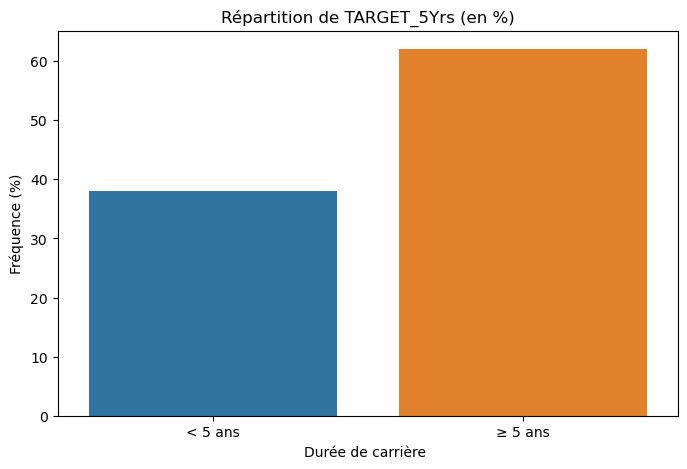

In [512]:
# Visualisation de la répartition de TARGET_5Yrs
plt.figure(figsize=(8, 5))
sns.barplot(x=target_frequencies.index, y=target_frequencies.values)
plt.title('Répartition de TARGET_5Yrs (en %)')
plt.xlabel('Durée de carrière ')
plt.ylabel('Fréquence (%)')
plt.xticks(ticks=[0, 1], labels=['< 5 ans', '≥ 5 ans'])
plt.show()

La répartition des classes est la suivante:
- Environ 62% (824 joueurs) ont eu une carrière de 5 ans ou plus.
- Environ 38% (504 joueurs) ont eu une carrière plus courte.

📌 Implications pour l'analyse

✔ Ce désiquilibre peut poser un problème lors de l'entrainement du modèle, car il pourrait privilégier la classe majoritaire. Il faudra envisager des techniques de correction.

👉 *Pour plus de détails sur les techniques de correction envisagées, veuillez vous référer au rapport technique.*

##### 2.2 Analyse statistiques et Visualisation des variables

**Distribution des variables statistiques**

Afin de mieux comprendre la structure des données, nous analysons la distribution des principales variables statistiques.

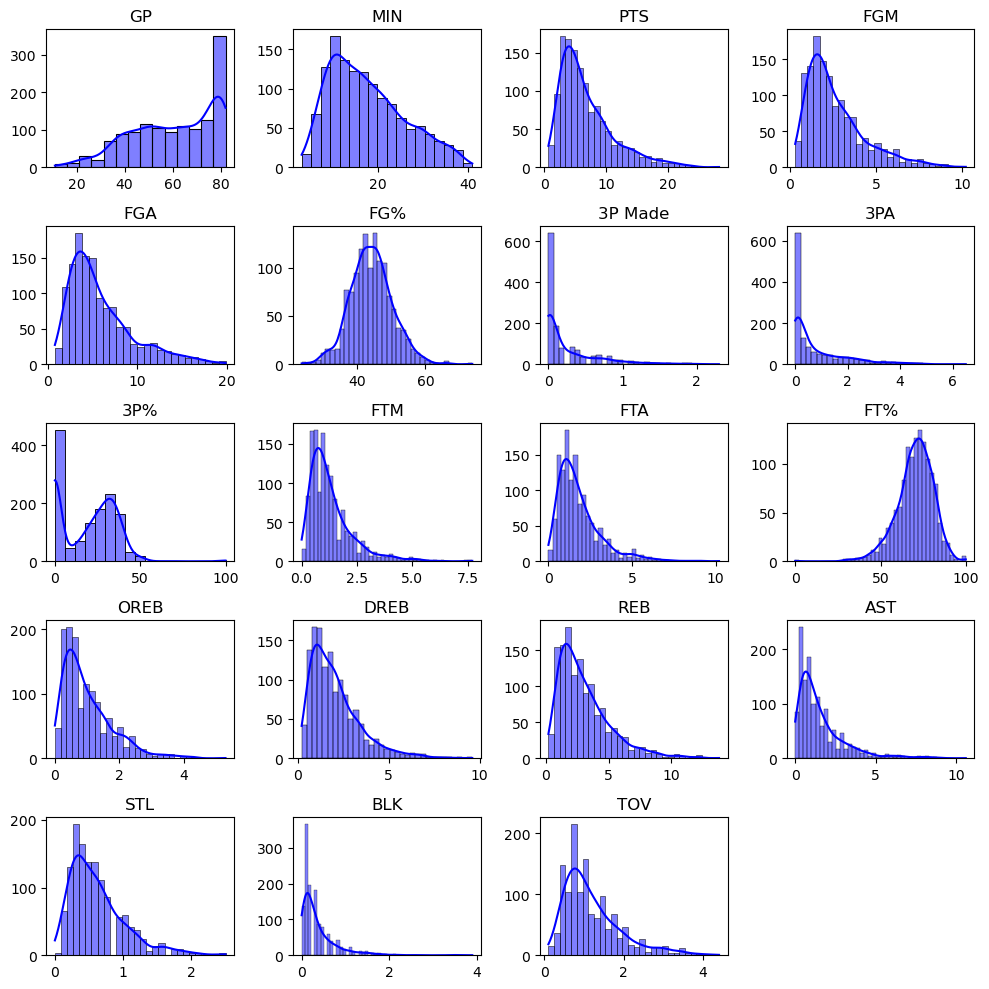

In [513]:
num_features = df_NBA_fnl.columns.drop(['TARGET_5Yrs', 'Name']) 

# Déterminer automatiquement le nombre de lignes et colonnes
num_cols = len(num_features)
rows = int(np.ceil(num_cols / 4))  # 4 colonnes par ligne pour meilleure lisibilité

plt.figure(figsize=(10, 2 * rows))  # Ajuste la taille en fonction du nombre de lignes

for i, col in enumerate(num_features, 1):
    plt.subplot(rows, 4, i)  # Adapter aux dimensions calculées
    sns.histplot(df_NBA_fnl[col], kde=True, color='blue')
    plt.title(col)
    plt.xlabel("")  # Enlever les labels pour plus de lisibilité
    plt.ylabel("")

plt.tight_layout()
plt.show()

L'analyse des distributions des différentes statistiques des joueurs révèle plusieurs caractéristiques importantes :

- Les statistiques 'PTS', 'FGM', 'FGA', '3P Made', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV' présentent une asymétrie positive. Cela signifie que la majorité des joueurs ont des valeurs relativement faibles, tandis qu'un petit nombre présente des valeurs très élevées.

- Les statistiques FG% (pourcentage de réussite au tir) et 3P% (pourcentage de réussite aux tirs à 3 points) affichent une distribution plus symétrique, centrée autour d’une moyenne d’environ 40-50% pour FG%.

- La distribution de 3P Made, 3PA et 3P% montre un pic à 0, ce qui peut indiquer que de nombreux joueurs (probablement des intérieurs ou des joueurs en début de carrière) ne tentent pas de tirs à 3 points.

On utilise skewness pour mesurer la distribution :
- Si |skewness| > 1 -> Forte asymétrie , transformation 
- Si 0.5 < |skewness| < 1 -> Asymétrie modérée , transformation
- Si |skewness| < 0.5 -> quasi-normale, pas besoin de transformation
- Asymétrie négative (skew < -0.5) → Inversion + log

Transformation des variables pour corriger l'Asymétrie 

In [514]:
X = df_NBA_fnl.drop(columns=['TARGET_5Yrs','Name'])
skewness = X.apply(lambda x: skew(x.dropna()))

In [515]:
#Identifier les variables par catégorie d'asymétrie 
high_skew_features = skewness[skewness > 1].index.tolist()  # Forte asymétrie positive
moderate_skew_features = skewness[(skewness > 0.5) & (skewness <= 1)].index.tolist()  # Asymétrie modérée
neg_skew_features = skewness[skewness < -0.5].index.tolist()  # Asymétrie négative

#Identifier les variables avec un pic à 0 (> 30% de zéros)
zero_features = [col for col in X.columns if (X[col] == 0).sum() / len(X) > 0.3]

#Sélectionner uniquement celles qui sont aussi fortement asymétriques
zero_skew_features = [col for col in zero_features if col in high_skew_features]

print(f"🎯 Variables avec forte asymétrie positive : {high_skew_features}")
print(f"🎯 Variables avec asymétrie modérée : {moderate_skew_features}")
print(f"🎯 Variables avec asymétrie négative : {neg_skew_features}")
print(f"🎯 Variables avec pic à 0 ET forte asymétrie : {zero_skew_features}")

🎯 Variables avec forte asymétrie positive : ['PTS', 'FGM', 'FGA', '3P Made', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']
🎯 Variables avec asymétrie modérée : ['MIN']
🎯 Variables avec asymétrie négative : ['FT%']
🎯 Variables avec pic à 0 ET forte asymétrie : ['3P Made']


Selon le niveau d'asymétrie, on applique une transformation adaptée

In [516]:
# Appliquer PowerTransformer à certaines variables spécifiques
specific_features = ['3P Made', '3PA', 'FTM', 'FTA', 'OREB', 'AST', 'STL', 'BLK', 'TOV']

# PowerTransformer (méthode Yeo-Johnson) pour mieux gérer l'asymétrie
power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
X[specific_features] = power_transformer.fit_transform(X[specific_features])

# Appliquer log(1+X) à certaines variables spécifiques avec forte asymétrie
log_transform = FunctionTransformer(np.log1p, validate=True)

other = ['PTS', 'FGM', 'FGA', 'FTA', 'DREB', 'REB','3P Made']

# Appliquer log(1 + X) pour les variables asymétriques positives
X[other] = log_transform.transform(X[other])

# Appliquer sqrt(X) pour les variables avec une asymétrie modérée
X[moderate_skew_features] = np.sqrt(X[moderate_skew_features])

# Utiliser PowerTransformer pour les variables avec asymétrie négative ou avec une distribution complexe
power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
X[neg_skew_features] = power_transformer.fit_transform(X[neg_skew_features])

/Users/ibtissama/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [517]:
# Recalculer l'asymétrie après transformation
skewness_after = X.apply(lambda x: skew(x.dropna()))

# Comparer avant/après
comparison = pd.DataFrame({"Avant": skewness, "Après": skewness_after})
print("📊 Comparaison de l'asymétrie avant et après transformation :")
print(comparison)

📊 Comparaison de l'asymétrie avant et après transformation :
            Avant     Après
GP      -0.477023 -0.477023
MIN      0.630310  0.220882
PTS      1.387131  0.209635
FGM      1.342535  0.388213
FGA      1.297148  0.270015
FG%      0.210373  0.210373
3P Made  2.032943  0.480004
3PA      1.816756  0.334125
3P%      0.301130  0.301130
FTM      1.941407  0.045850
FTA      1.843909 -0.323085
FT%     -0.766998 -0.005837
OREB     1.444406  0.072483
DREB     1.488538  0.395768
REB      1.475280  0.313197
AST      2.128103  0.095102
STL      1.360859  0.059275
BLK      2.805656  0.218211
TOV      1.342649  0.036173


In [518]:
target = df_NBA_fnl['TARGET_5Yrs'] 
names = df_NBA_fnl['Name']

X['TARGET_5Yrs'] = target
X['Name'] = names
X.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,Name
0,36,5.234501,2.128232,1.280934,2.151762,34.7,0.192701,0.582835,25.0,0.685467,...,4054.991944,0.437272,1.481605,1.629241,0.743655,0.276163,0.230417,0.618887,0.0,Brandon Ingram
1,35,5.186521,2.104134,1.098612,2.041220,29.6,0.211630,0.622042,23.5,0.828312,...,4900.120144,0.349314,1.098612,1.252763,0.933167,0.488834,0.258638,0.681474,0.0,Andrew Harrison
2,74,3.911521,1.824549,1.098612,1.740466,42.2,0.177705,0.549451,24.4,0.511174,...,3710.333310,0.349314,0.993252,1.163151,0.545716,0.320128,0.194386,0.540131,0.0,JaKarr Sampson
3,58,3.405877,1.902108,1.193922,1.871802,42.6,0.077516,0.312923,22.6,0.511174,...,3934.312002,0.539762,0.641854,1.064711,0.479259,0.358047,0.085145,0.540131,1.0,Malik Sealy
4,48,3.391165,1.704748,0.955511,1.386294,52.4,-0.000000,0.089482,0.0,0.622100,...,3756.909030,0.539762,0.916291,1.252763,0.239076,0.224645,0.230417,0.475038,1.0,Matt Geiger


**Comparaison des distribution entre les classes**

Afin de mieux comprendre l’impact des statistiques sur la longévité en NBA, nous allons comparer la distribution des variables entre :

- Les joueurs ayant une carrière ≥ 5 ans
- Les joueurs ayant une carrière < 5 ans

Cette analyse nous permettra d’identifier les statistiques différenciantes entre les deux groupes.

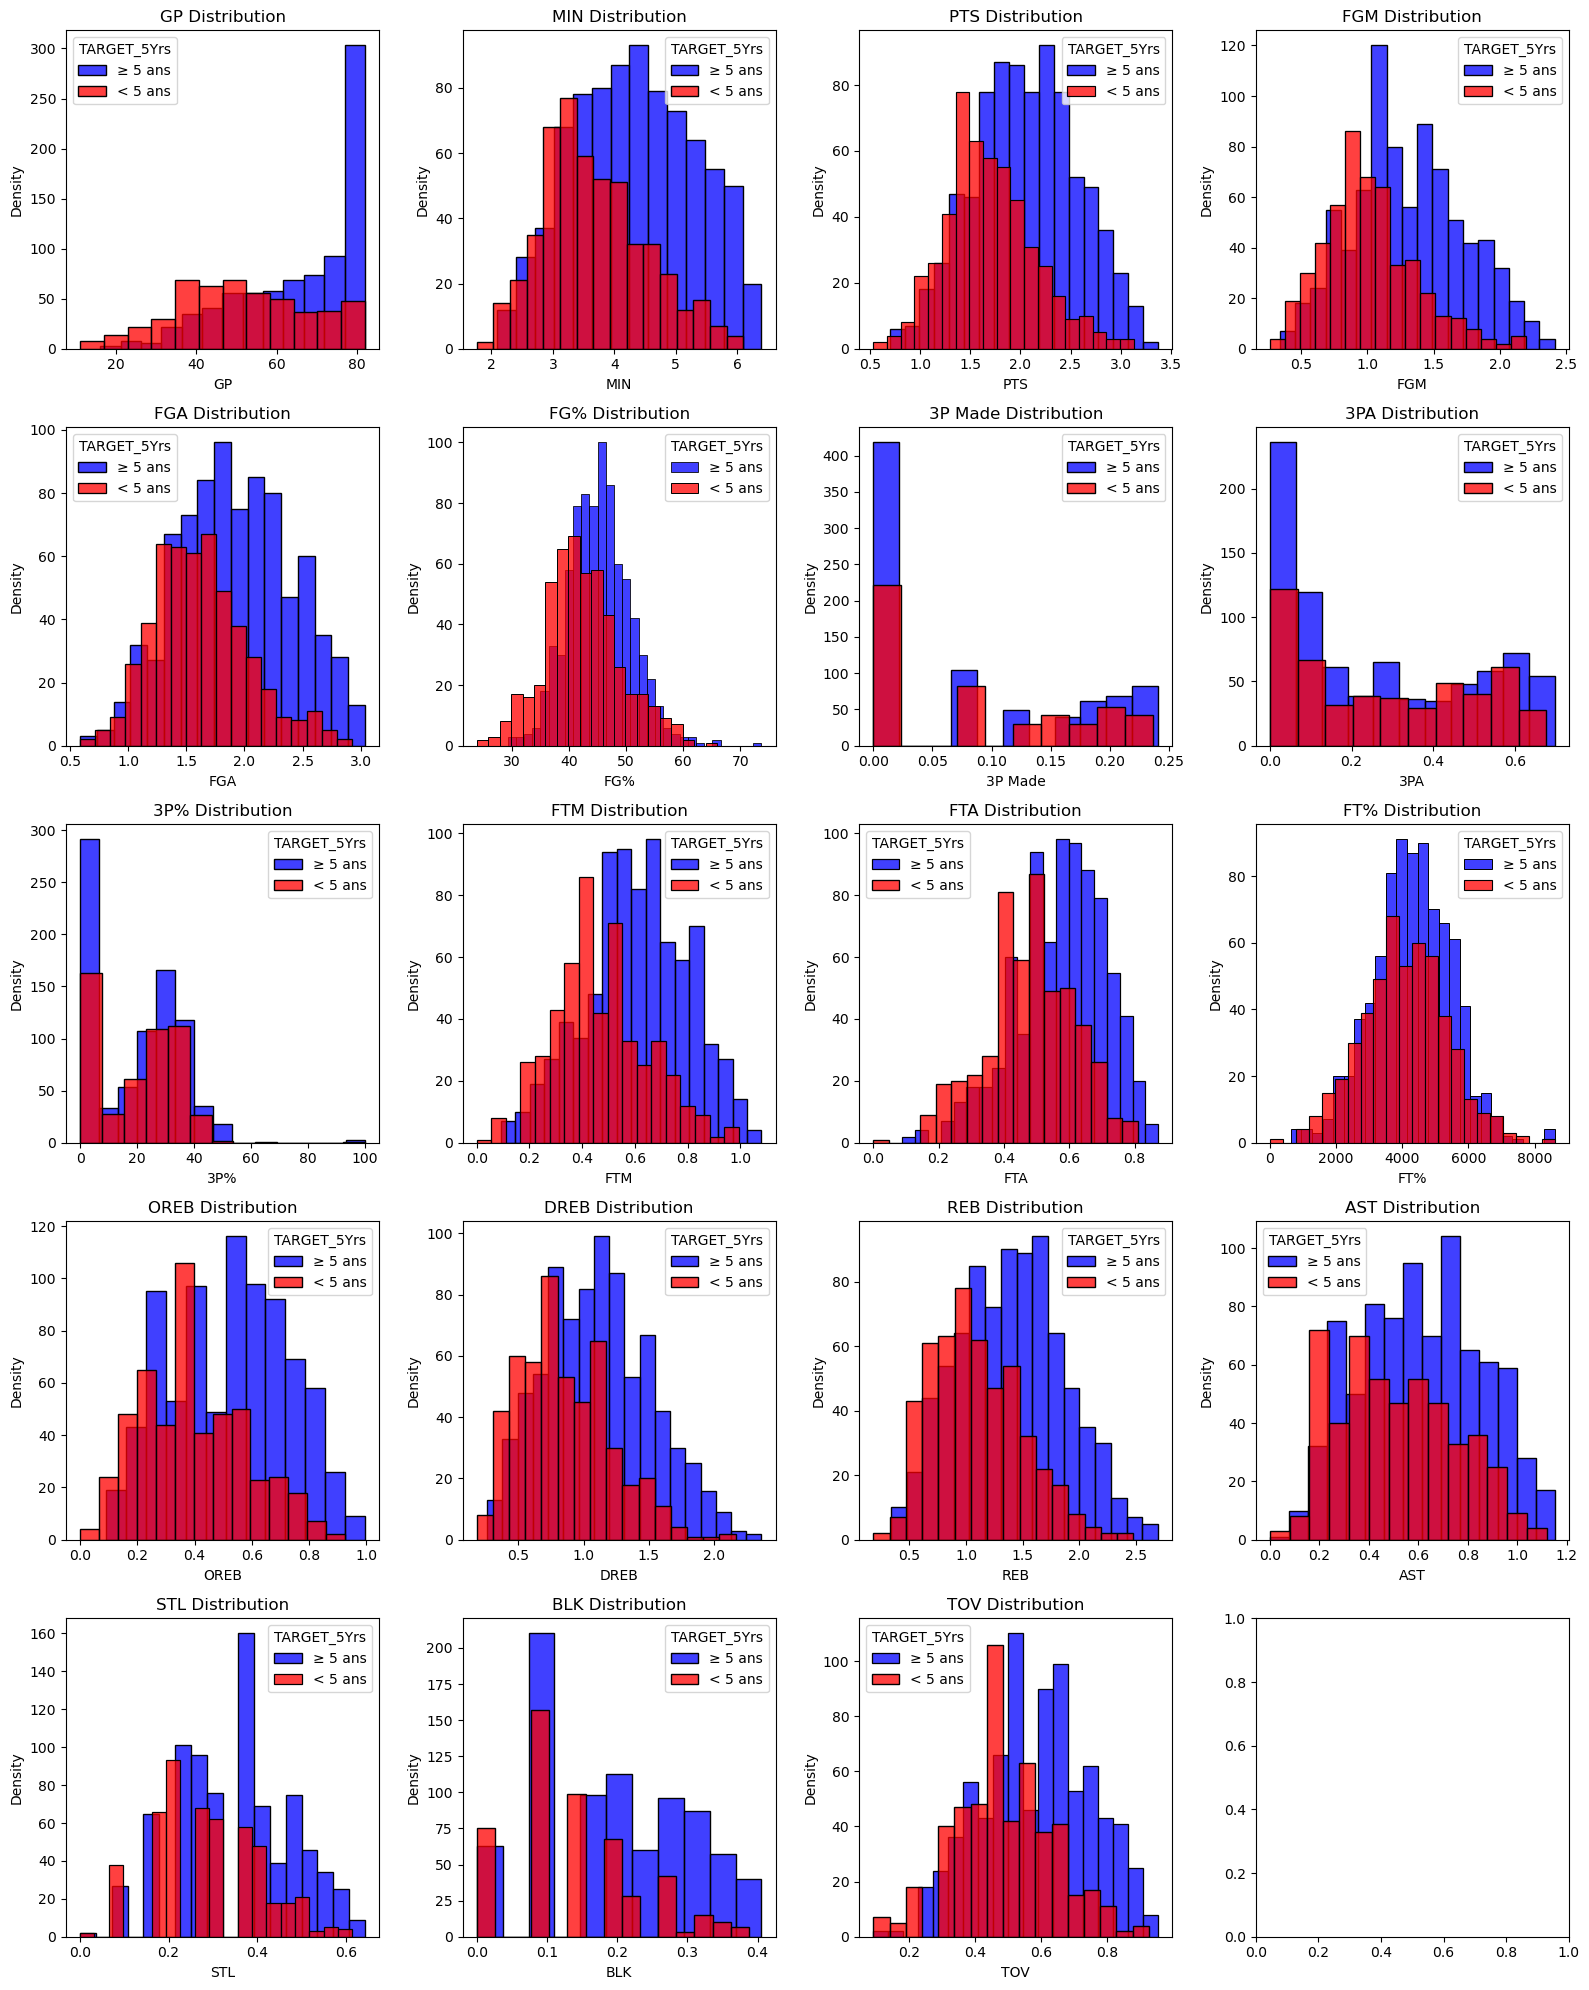

In [519]:
features = X.columns.drop(['TARGET_5Yrs', 'Name'])

# Déterminer dynamiquement le nombre de lignes et de colonnes pour le subplot
num_cols = len(features)
rows = int(np.ceil(num_cols / 4))  # 4 colonnes par ligne pour une meilleure lisibilité

# Création de la figure avec un agencement dynamique
fig, axes = plt.subplots(rows, 4, figsize=(16, 4 * rows))

# Parcourir les colonnes et afficher les distributions
for i, col in enumerate(features):
    sns.histplot(X[X["TARGET_5Yrs"] == 1][col], label="≥ 5 ans", ax=axes[i // 4, i % 4], color='blue')
    sns.histplot(X[X["TARGET_5Yrs"] == 0][col], label="< 5 ans", ax=axes[i // 4, i % 4], color='red')
    axes[i // 4, i % 4].set_title(f"{col} Distribution")
    axes[i // 4, i % 4].legend(title="TARGET_5Yrs")
    axes[i // 4, i % 4].set_xlabel(f"{col}")
    axes[i // 4, i % 4].set_ylabel("Density")

plt.tight_layout()
plt.show()

- Les joueurs ayant une carrière ≥ 5 ans ont généralement des moyennes plus élévées dans ces statistiques.
- Les distributions montrent un décalage à droite pour les joueurs ≥ 5 ans, suggérant que ceux qui restent plus longtemps en NBA sont souvent plus performants dans ces catégories.
- La différence entre les joueurs avec une carrière ≥ 5 ans et < 5 ans est moins marquée pour 3P Made, 3PA et 3P% que pour les autres statistiques.

📌 Implications pour l'analyse

✔ Les statistiques offensive(PTS, FGM, FTA, FGA), défensive(TOV) et rebond (DREB, REB) sont des indicateurs clés de la longévité en NBA : les joueurs qui restent plus de 5 ans ont tendance à exceller dans ces domaines.

##### 2.2 Selection des variables 

Dans cette section, nous identifions les variables les plus influentes pour la prédiction tout en s'assurant qu'elles ne sont pas fortement corrélées entre elles. 

In [520]:
# correlation entre variables cible et features
correlation = df_NBA_fnl.corr()['TARGET_5Yrs'].sort_values(ascending=False)
print(correlation)

TARGET_5Yrs    1.000000
GP             0.403239
MIN            0.319873
FGM            0.318181
PTS            0.316692
REB            0.301266
FTM            0.298180
FTA            0.298058
OREB           0.294666
FGA            0.292736
DREB           0.286970
TOV            0.275046
FG%            0.230963
STL            0.229662
BLK            0.210668
AST            0.178201
FT%            0.105395
3P Made        0.037386
3PA            0.018770
3P%           -0.000787
Name: TARGET_5Yrs, dtype: float64


/var/folders/dj/km2r8x2x49n1n14w2nxczv_40000gn/T/ipykernel_4891/3304291487.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_NBA_fnl.corr()['TARGET_5Yrs'].sort_values(ascending=False)


/var/folders/dj/km2r8x2x49n1n14w2nxczv_40000gn/T/ipykernel_4891/1251644054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")


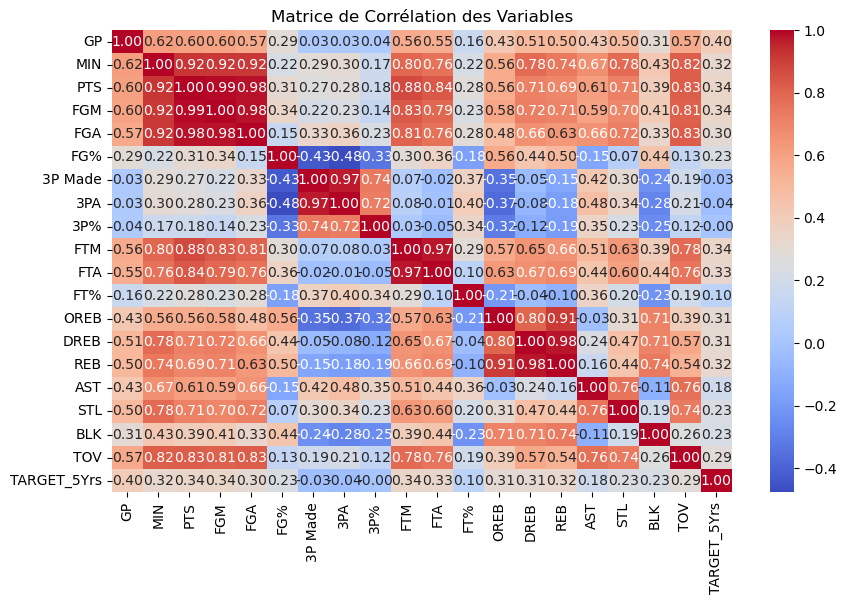

In [491]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matrice de Corrélation des Variables')
plt.show()

In [494]:
#Sélection des variables les plus importantes
X_t = X.drop(columns=['TARGET_5Yrs','Name'])
y = X['TARGET_5Yrs']

selector = SelectKBest(score_func=f_classif, k=10)  # Sélection des 10 meilleures variables
X_selected = selector.fit_transform(X_t, y)

# 📌 Affichage des variables sélectionnées
selected_features = np.array(features)[selector.get_support()]
print("Variables sélectionnées :", selected_features)

Variables sélectionnées : ['GP' 'MIN' 'PTS' 'FGM' 'FGA' 'FTM' 'FTA' 'OREB' 'DREB' 'REB']


Enregistrement des datasets pré-traitées sous format d'un fichier CSV pour une utilisation utlérieur (entrainemenent des modèles de classification)

In [401]:
df_NBA_fnl.to_csv("NBA_df.csv", index="False")

In [497]:
X.to_csv("NBA_transf.csv", index="False")